In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tsds
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [2]:
test_dir=r"C:\Users\moham\OneDrive\Desktop\Deep learning\combined_images"

In [3]:
train=keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 44000 files belonging to 4 classes.


In [4]:
for images,labels in train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [5]:
def process(image,label):
    image=image/255
    return image,label
train=train.map(process)

In [6]:
print(train)
print(images)
print(labels)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
tf.Tensor(
[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  ...

  [[ 0.          0.          0.        ]
   [ 0.          0.       

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(1280,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
evl=model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
x=np.array(images)
y=np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [12]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1600 - loss: 6.7452 - val_accuracy: 0.2857 - val_loss: 381.6249
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3200 - loss: 127.8441 - val_accuracy: 0.0000e+00 - val_loss: 595.1278
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3600 - loss: 246.2215 - val_accuracy: 0.1429 - val_loss: 507.1793
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1600 - loss: 215.4790 - val_accuracy: 0.1429 - val_loss: 370.2225
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4400 - loss: 139.7657 - val_accuracy: 0.1429 - val_loss: 252.0135
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3600 - loss: 84.4039 - val_accuracy: 0.1429 - val_loss: 153.2380
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7200 - loss: 42.2869 - val_accuracy: 0.2857 - val_loss: 128.0130
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3200 - loss: 51.8124 - val_accuracy: 0.2857 - val_

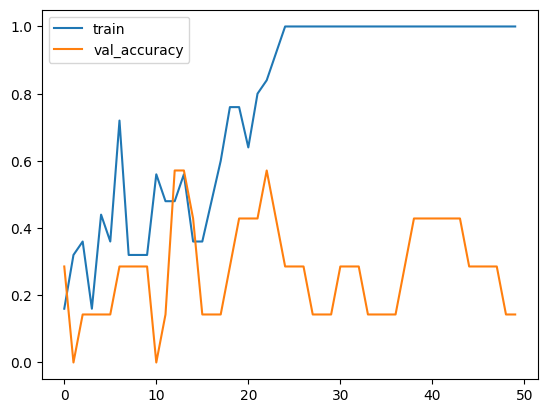

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


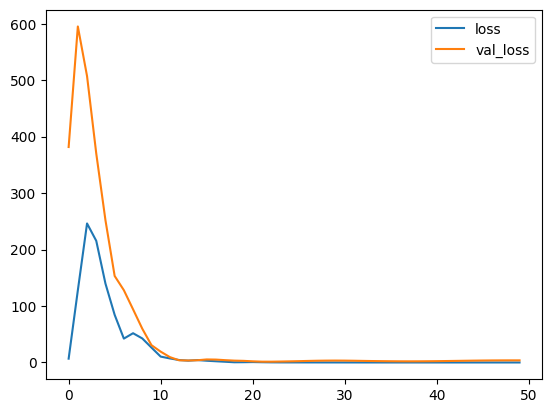

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Predicted emotion: ModerateDemented
Confidence: 47.27%


In [16]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(256,256, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20,restore_best_weights=True)

In [20]:
history=model.fit(x_train,y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/40


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2400 - loss: 23.6381 - val_accuracy: 0.0000e+00 - val_loss: 1555.3018
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 0.3600 - loss: 1107.4454 - val_accuracy: 0.2857 - val_loss: 579.8338
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - accuracy: 0.3200 - loss: 713.1317 - val_accuracy: 0.5714 - val_loss: 254.5364
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - accuracy: 0.1600 - loss: 540.0616 - val_accuracy: 0.2857 - val_loss: 89.7033
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 0.3200 - loss: 179.7298 - val_accuracy: 0.2857 - val_loss: 40.1045
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.3200 - loss: 52.3041 - val_accuracy: 0.1429 - val_loss: 55.9607
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - accuracy: 0.4000 - loss: 44.0794 - val_accuracy: 0.1429 - val_loss: 58.1959
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - accuracy: 0.4400 - loss: 30.0024 - val_accuracy: 0.14

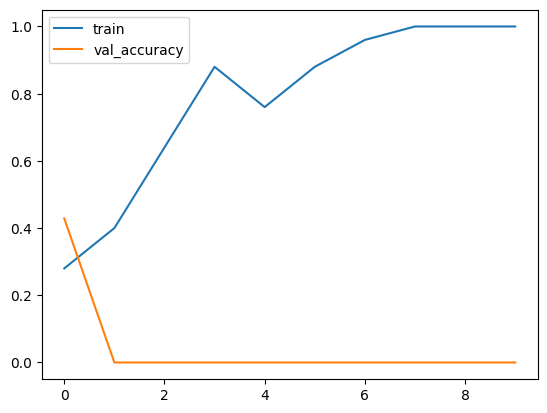

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [ ]:
# ==============================
# ❤ Make Predictions
# ==============================
import tensorflow as tf
from tensorflow.keras.preprocessing import image

class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

img_path = r"moderate.ppm"  # Change image path
img = image.load_img(img_path, target_size=(256,256,3))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Predicted emotion: ModerateDemented
Confidence: 47.40%


In [22]:
base=tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),
    input_tensor=None,
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
    name='densenet121'
)

In [23]:
model=Sequential([
    base,
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(128,activation='relu'),
    Dropout(0.15),
    Dense(4,activation='softmax'),
])

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,727,044 (29.48 MB)

 Trainable params: 7,643,396 (29.16 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [25]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 117s 117s/step - accuracy: 0.2800 - loss: 1.4974 - val_accuracy: 0.4286 - val_loss: 1.3394
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4000 - loss: 1.0938 - val_accuracy: 0.0000e+00 - val_loss: 1.5077
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6400 - loss: 0.8739 - val_accuracy: 0.0000e+00 - val_loss: 1.6030
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8800 - loss: 0.6325 - val_accuracy: 0.0000e+00 - val_loss: 1.6545
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7600 - loss: 0.6227 - val_accuracy: 0.0000e+00 - val_loss: 1.6790
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8800 - loss: 0.4918 - val_accuracy: 0.0000e+00 - val_loss: 1.6943
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9600 - loss: 0.4191 - val_accuracy: 0.0000e+00 - val_loss: 1.6963
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.3655 - val_accuracy: 

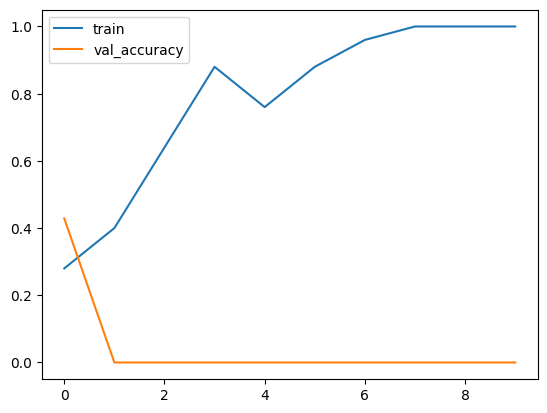

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


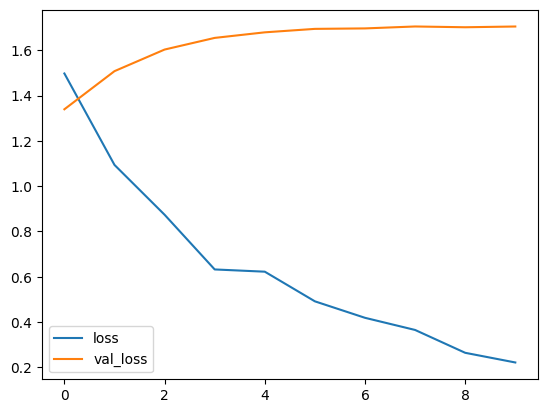

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted emotion: ModerateDemented
Confidence: 34.82%


In [32]:
base1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
    name="vgg16",
)

In [33]:
model=Sequential([
    base1,
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(6,activation='softmax'),
])

In [34]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [38]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.6800 - loss: 0.6972 - val_accuracy: 0.2857 - val_loss: 1.1840
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6800 - loss: 0.5713 - val_accuracy: 0.5714 - val_loss: 1.0197
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7200 - loss: 0.5916 - val_accuracy: 0.5714 - val_loss: 1.1751
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9200 - loss: 0.4411 - val_accuracy: 0.4286 - val_loss: 1.5410
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9600 - loss: 0.1750 - val_accuracy: 0.2857 - val_loss: 2.1534
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 0.0893 - val_accuracy: 0.1429 - val_loss: 2.5996
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.1080 - val_accuracy: 0.4286 - val_loss: 2.6284
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 0.0581 - val_accuracy: 0.4286 - val_loss: 2.4503


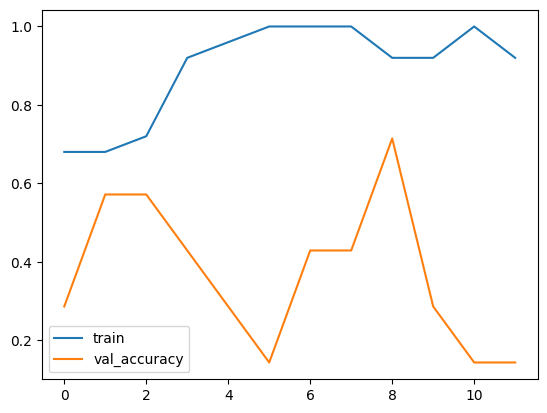

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


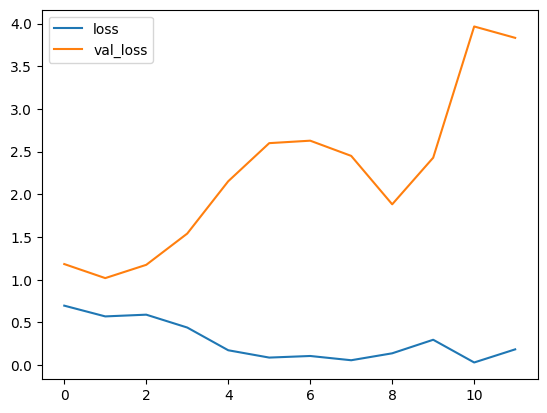

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_height = 256
img_width = 256
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_path = r"verymild.ppm"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Predicted emotion: MildDemented
Confidence: 33.46%
